# Plotting diphthongs in R

In [1]:
suppressMessages(library(dplyr))
library(tidyr)
library(phonR)
library(repr)
options(repr.plot.width=8, repr.plot.height=4.5)  # make plots wider
options(warn=-1)                                  # suppress warning messages

## Load the data

In [2]:
formant_data <- read.csv('diphthongs-bVd.csv')
head(formant_data)

filename,ipa,pct,time,formant,formant_value
bayed1_11.wav,eɪ,5%,0.1428872,f1,392.1264
bayed1_11.wav,eɪ,5%,0.1428872,f2,1974.8686
bayed1_11.wav,eɪ,10%,0.1572832,f1,415.3041
bayed1_11.wav,eɪ,10%,0.1572832,f2,2183.5841
bayed1_11.wav,eɪ,15%,0.1716793,f1,390.0604
bayed1_11.wav,eɪ,15%,0.1716793,f2,2248.9935


## Data cleaning
After loading the data, we notice that the `pct` column is strings. It would be easier if they were numbers (for sorting purposes), so let's convert them. Let's also reshape the data from "long format" (1 formant measurement per line) into "wide format" (1 record per line).  The way we do this will have the side effect of dropping the `time` values (which we don't need anyway).

In [3]:
formant_data$pct <- as.numeric(gsub(formant_data$pct, pattern='%', replacement=''))
column_order <- with(formant_data, c(paste('f1', unique(pct), sep="_"),
                                     paste('f2', unique(pct), sep="_")))
wide_data <- formant_data %>% 
             select(-time) %>%
             unite(formant_pct, formant, pct) %>% 
             spread(formant_pct, formant_value)

wide_data <- wide_data[c("filename", "ipa", column_order)]
head(wide_data)

filename,ipa,f1_5,f1_10,f1_15,f1_20,f1_25,f1_30,f1_35,f1_40,⋯,f2_50,f2_55,f2_60,f2_65,f2_70,f2_75,f2_80,f2_85,f2_90,f2_95
bayed1_11.wav,eɪ,392.1264,415.3041,390.0604,386.7762,372.4641,368.1704,360.8333,349.9042,⋯,2573.301,2594.448,2611.780,2590.720,2579.133,2542.685,2560.215,2568.805,2548.638,2516.739
bayed2_11.wav,eɪ,433.2032,411.7695,405.0751,403.6373,387.1750,355.5248,355.8098,352.3525,⋯,2611.634,2651.047,2646.782,2651.452,2625.804,2608.987,2550.322,2446.807,2566.075,2481.867
bayed3_11.wav,eɪ,389.2753,423.5623,398.0654,391.4696,376.7775,376.4952,361.2225,345.4540,⋯,2577.478,2572.299,2619.269,2631.663,2623.571,2632.898,2608.606,2578.935,2584.854,2581.668
bayed4_11.wav,eɪ,391.4808,417.1416,392.4950,381.2398,383.7613,374.7541,357.2229,347.4606,⋯,2533.160,2560.582,2548.881,2553.753,2565.657,2590.579,2612.541,2623.942,2545.119,2478.699
bide1_11.wav,aɪ,524.3176,638.3458,669.7925,647.2919,620.6892,601.1240,628.9206,646.9898,⋯,1420.179,1500.899,1597.470,1748.957,1868.008,2020.079,2111.394,2204.389,2348.651,2411.961
bide2_11.wav,aɪ,561.4538,669.9742,669.1176,646.6599,625.9671,629.0960,690.4700,695.1024,⋯,1363.999,1499.942,1593.605,1702.731,1831.491,2016.975,2167.457,2239.525,2392.209,2448.126


## Plotting

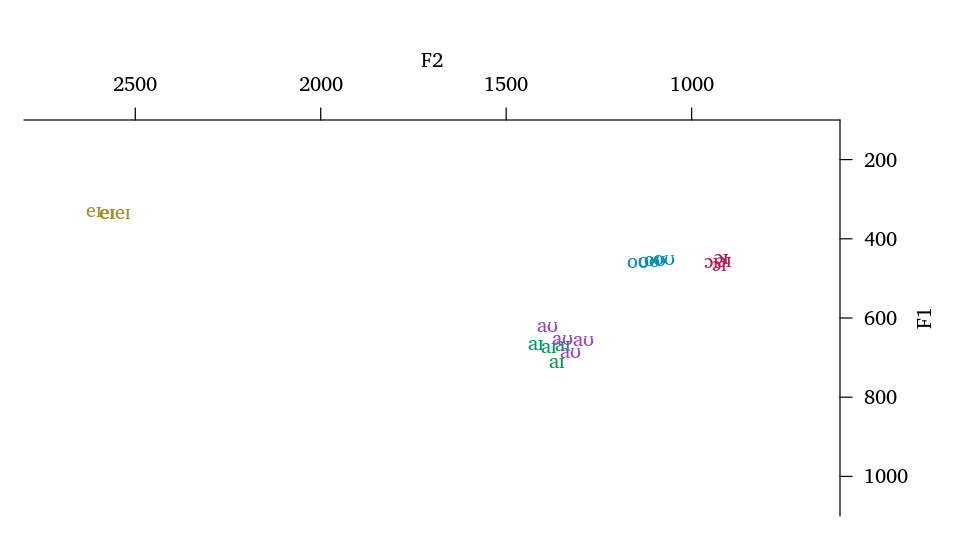

In [4]:
with(wide_data, plotVowels(f1_50, f2_50, vowel=ipa, var.col.by=ipa,
                           pch.tokens=ipa, pretty=TRUE, family="Charis SIL",
                           xlim=c(2800, 600), ylim=c(1100, 100)))

Now let's pick 2 timepoints in each diphthong. We could pick the `20%` and `80%` points, or `30%`-`70%`, or `10%`-`90%`... which is best? Also, we'll want to connect the start- and end-points with a line, so we'll need to do some fancy `paste`-ing to get the right columns.

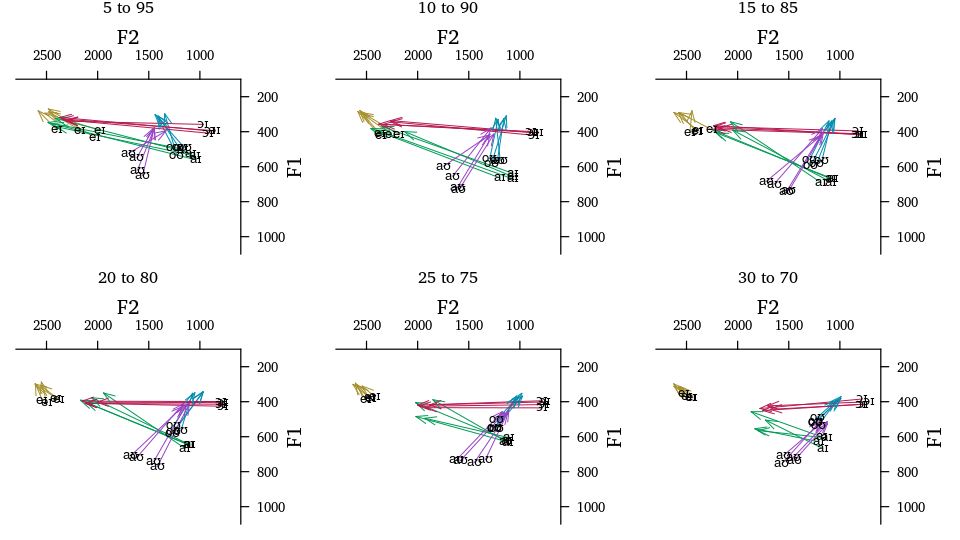

In [5]:
pairs <- list(c(5, 95), c(10, 90), c(15, 85), c(20, 80), c(25, 75), c(30, 70))
par(mfrow=c(2, 3))

for(pair in pairs) {
    this_f1 <- as.matrix(cbind(wide_data[paste("f1", pair, sep="_")]))
    this_f2 <- as.matrix(cbind(wide_data[paste("f2", pair, sep="_")]))
    with(wide_data, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                               pch.tokens=NA, pretty=TRUE, family="Charis SIL",
                               diph.arrows=TRUE, diph.args.tokens=list(lwd=0.8),
                               xlim=c(2800, 600), ylim=c(1100, 100),
                               main=paste(pair, collapse=" to "), cex.main=0.8))
    text(wide_data[[paste("f2", pair[1], sep="_")]],
         wide_data[[paste("f1", pair[1], sep="_")]],
         wide_data[['ipa']])
}

Looking at the blue traces for oʊ, notice that the `30-70%` lines go up and to the right, whereas the `5-95%` lines go up and to the left.  Let's plot several spans of just that vowel to get a closer look:

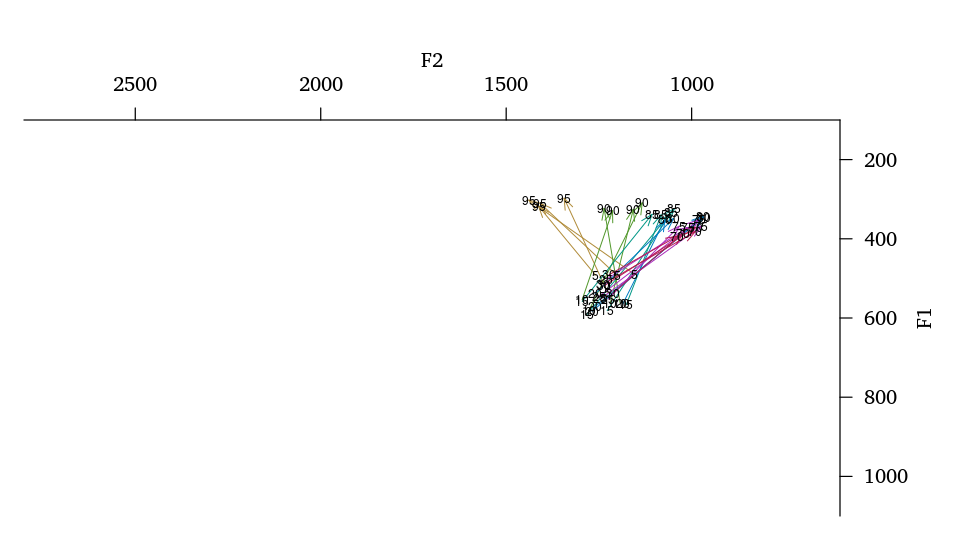

In [6]:
ou <- filter(wide_data, ipa == "oʊ")

f1_pairs <- list()
f2_pairs <- list()
for(pair in pairs) {
    this_f1 <- as.matrix(cbind(ou[paste("f1", pair, sep="_")]))
    this_f2 <- as.matrix(cbind(ou[paste("f2", pair, sep="_")]))
    f1_pairs <- append(f1_pairs, list(this_f1))
    f2_pairs <- append(f2_pairs, list(this_f2))
}
color <- rep(seq_along(f1_pairs), each=nrow(ou))
f1_pairs <- do.call(rbind, f1_pairs)
f2_pairs <- do.call(rbind, f2_pairs)
vowel <- rep("oʊ", nrow(f1_pairs))
plotVowels(f1_pairs, f2_pairs, vowel=vowel, var.col.by=color, pch.tokens=NA,
           pretty=TRUE, family="Charis SIL", 
           diph.arrows=TRUE, diph.args.tokens=list(lwd=0.8),
           xlim=c(2800, 600), ylim=c(1100, 100))
text(f2_pairs[,1], f1_pairs[,1], rep(do.call(rbind, pairs)[,1], each=nrow(ou)), cex=0.6)
text(f2_pairs[,2], f1_pairs[,2], rep(do.call(rbind, pairs)[,2], each=nrow(ou)), cex=0.6)

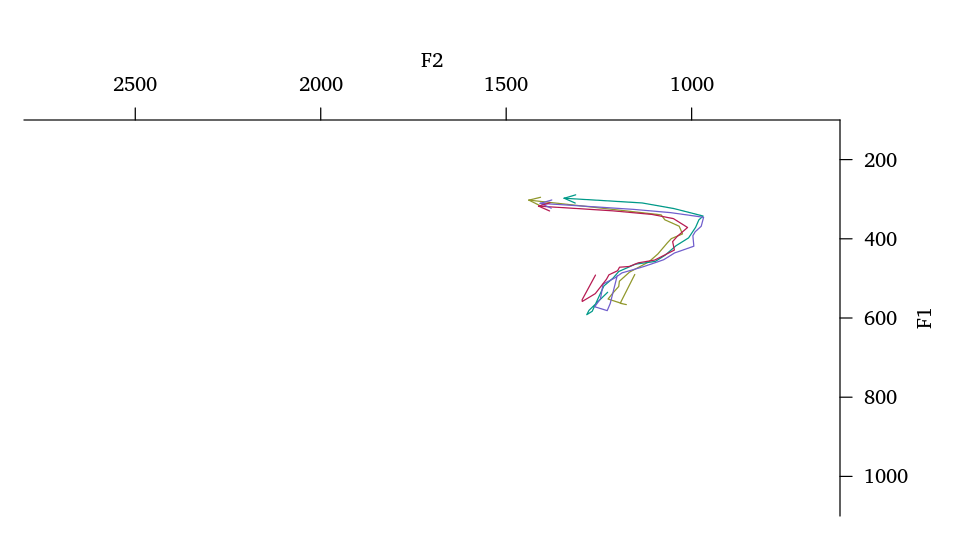

In [7]:
this_f1 <- as.matrix(select(ou, starts_with("f1")))
this_f2 <- as.matrix(select(ou, starts_with("f2")))
with(ou, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=rownames(ou),
                    pch.tokens=NA, pretty=TRUE, family="Charis SIL",
                    diph.arrows=TRUE, xlim=c(2800, 600), ylim=c(1100, 100)))

Let's see what happens when we plot all the points for all the vowels. For good measure, let's average the tokens together, and add a mean track for each vowel type:

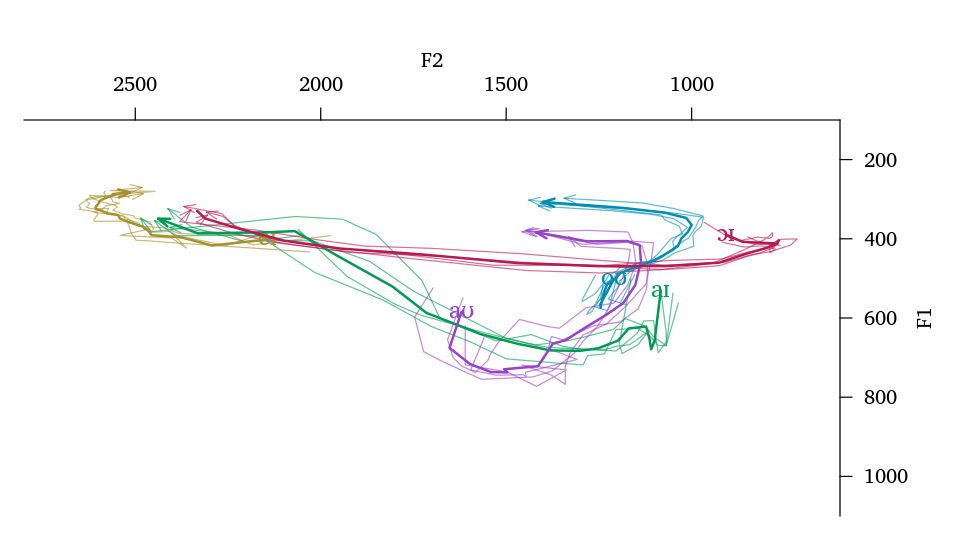

In [8]:
this_f1 <- as.matrix(select(wide_data, starts_with("f1")))
this_f2 <- as.matrix(select(wide_data, starts_with("f2")))
with(wide_data, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                           pch.tokens=NA,  alpha.tokens=0.6,
                           pretty=TRUE, family="Charis SIL",
                           plot.means=TRUE, cex.means=1.2, pch.means=ipa,
                           diph.arrows=TRUE, diph.args.means=list(lwd=2),
                           xlim=c(2800, 600), ylim=c(1100, 100)))

Nice, but a little messy... let's try smoothing with a moving average of length 3.

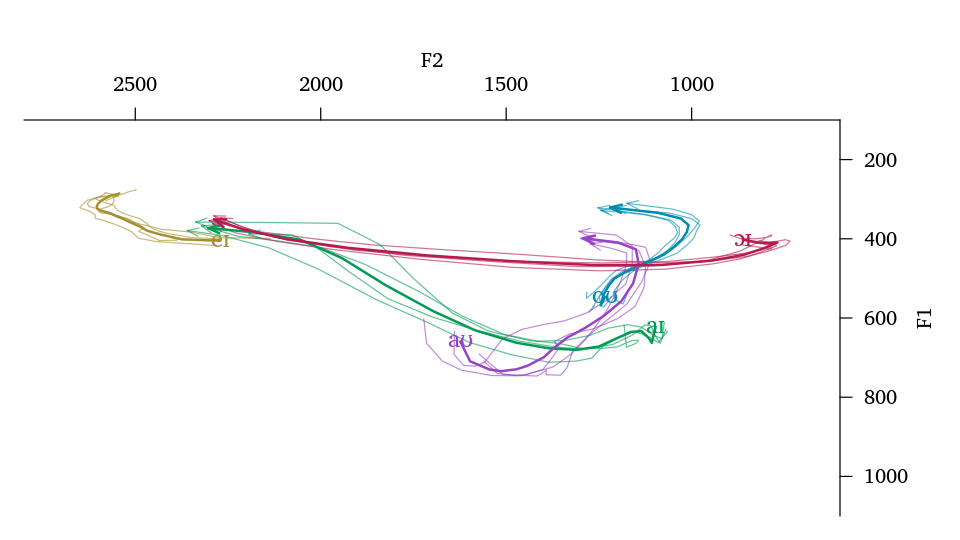

In [9]:
this_f1 <- t(zoo::rollmean(t(this_f1), 3, align="center"))
this_f2 <- t(zoo::rollmean(t(this_f2), 3, align="center"))
with(wide_data, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                           pch.tokens=NA,  alpha.tokens=0.6,
                           pretty=TRUE, family="Charis SIL",
                           plot.means=TRUE, cex.means=1.2, pch.means=ipa,
                           diph.arrows=TRUE, diph.args.means=list(lwd=2),
                           xlim=c(2800, 600), ylim=c(1100, 100)))

## Issues to watch out for
Our data was fairly clean, but that won't always be the case.  Let's load some data from /hVd/ tokens from the same talker.

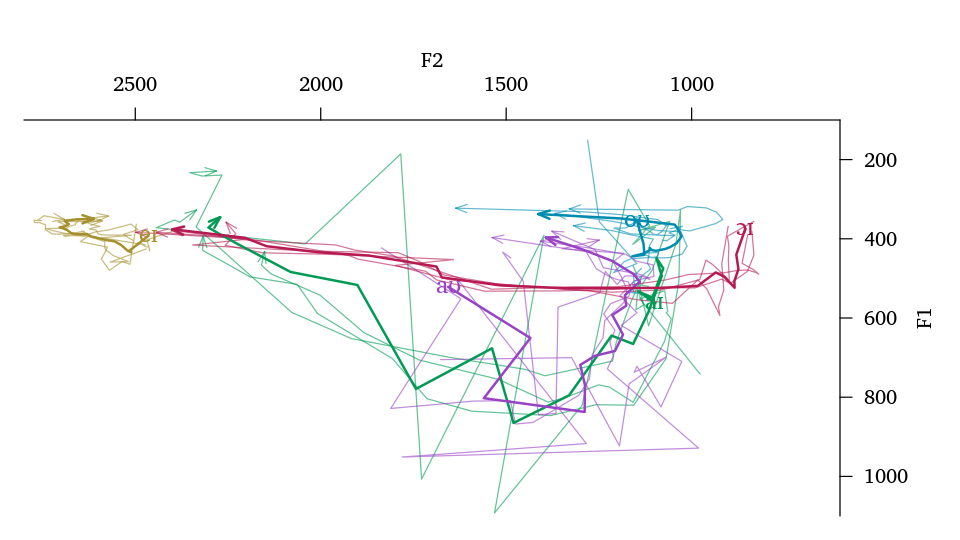

In [10]:
# read in the data
formant_data_hvd <- read.csv('diphthongs-hVd.csv')
# convert percentage strings to numbers
formant_data_hvd$pct <- as.numeric(gsub(formant_data_hvd$pct, pattern='%',
                                        replacement=''))
# convert long to wide format
column_order <- with(formant_data_hvd, c(paste('f1', unique(pct), sep="_"),
                                         paste('f2', unique(pct), sep="_")))
wide_data_hvd <- formant_data_hvd %>% 
                 select(-time) %>%
                 unite(formant_pct, formant, pct) %>% 
                 spread(formant_pct, formant_value)

wide_data_hvd <- wide_data_hvd[c("filename", "ipa", column_order)]
# plot
this_f1 <- as.matrix(select(wide_data_hvd, starts_with("f1")))
this_f2 <- as.matrix(select(wide_data_hvd, starts_with("f2")))
with(wide_data_hvd, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                               pch.tokens=NA,  alpha.tokens=0.6,
                               pretty=TRUE, family="Charis SIL",
                               plot.means=TRUE, cex.means=1.2, pch.means=ipa,
                               diph.arrows=TRUE, diph.args.means=list(lwd=2),
                               xlim=c(2800, 600), ylim=c(1100, 100)))

## Experimental
Another popular way of summarizing lots of tokens is to plot a ribbon showing the standard deviation around each data point.  Since these plots are not true functions, mathematically speaking (i.e., they turn back on themselves in the horizontal direction), this is actually rather trickier than we might think. Here instead we show ellipses illustrating the variation at each timepoint.

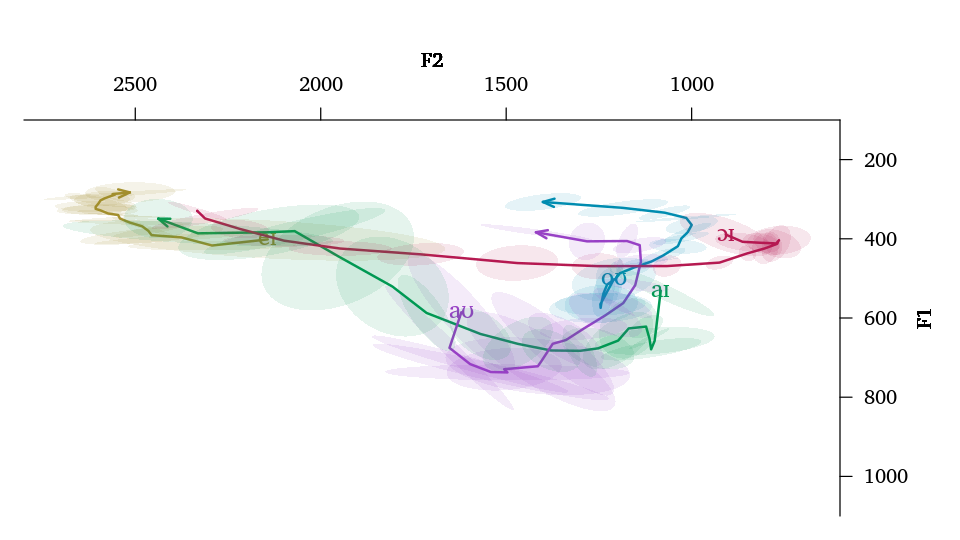

In [11]:
this_f1 <- as.matrix(select(wide_data, starts_with("f1")))
this_f2 <- as.matrix(select(wide_data, starts_with("f2")))

# plot means
with(wide_data, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                           plot.tokens=FALSE, plot.means=TRUE, pch.means=ipa,
                           cex.means=1.2, pretty=TRUE, family="Charis SIL",
                           diph.arrows=TRUE, diph.args.means=list(lwd=2),
                           xlim=c(2800, 600), ylim=c(1100, 100)))

# plot ellipses
for(timept in seq(5, 95, 5)) {
    par(new=TRUE)
    this_f1 <- as.matrix(wide_data[paste("f1", timept, sep="_")])
    this_f2 <- as.matrix(wide_data[paste("f2", timept, sep="_")])
    with(wide_data, plotVowels(this_f1, this_f2, vowel=ipa, var.col.by=ipa,
                               plot.tokens=FALSE, plot.means=FALSE,
                               ellipse.fill=TRUE, fill.opacity=0.1,
                               pretty=TRUE, family="Charis SIL", axes=FALSE,
                               xlim=c(2800, 600), ylim=c(1100, 100)))
}